In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Torch Autograd** is PyTorch's automatic differentiation engine that powers neural network training by computing gradients of tensor operations. It enables the easy implementation of backpropagation for optimizing complex models, making it very good and easy to use due to its seamless integration with PyTorch's dynamic computation graph, allowing flexible model training.


 <img src='https://learnopencv.com/wp-content/uploads/2024/08/Autograd-Pytorch.png' width=700 align='center'><br/>

In [3]:
!pip install -q torchviz

In [4]:
import torch
import matplotlib.pyplot as plt

# 1. Automatic Differentiation with `torch.autograd`

Before proceeding autograd, will understand the basic terms:

- **Forward Propagation**:
  - Computes the model's output by passing the input data through the network layers. It is often called Forward pass.

- **Backward Propagation**:
  - Calculates the gradients of the loss with respect to the model's parameters using the chain rule, enabling parameter updates to minimize the loss.



- We create two tensors `x` and `y` with `requires_grad=True`, indicating that we want to compute gradients for these tensors.



- We perform simple operations on `x` and `y` to obtain `z`.

- Computing Gradients:
We call `z.backward()` to compute the gradients of `z` with respect to `x` and `y`. The gradients are stored in the `grad` attribute of each tensor.




In the following example:


- The operation is $ z = x \cdot y + y^2 $.
- The partial derivative of $ z $ with respect to $ x $ is $ \frac{\partial z}{\partial x} = y $.
- The partial derivative of $ z $ with respect to $ y $ is $ \frac{\partial z}{\partial y} = x + 2y $.

Given $ x = 2.0 $ and $ y = 3.0 $:

- The gradient of $ z $ w.r.t. $ x $ is $ 3.0 $.
- The gradient of $ z $ w.r.t. $ y $ is $ 2.0 + 2 \cdot 3.0 = 8.0 $.

Tensors that require gradients will have their operations tracked by PyTorch's autograd engine, enabling the computation of gradients during backpropagation.


<img src=https://learnopencv.com/wp-content/uploads/2024/07/Autograd-Computation-Graph-2-2.png height = 500>


The automatic differentiation provided by `torch.autograd` simplifies this process by handling the complex chain rule calculations needed for backpropagation through the entire network.






For $\frac{\partial z}{\partial x}$:

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial p} \frac{\partial p}{\partial x} + \frac{\partial z}{\partial q} \frac{\partial q}{\partial x} = 1 \cdot y + 1 \cdot 0 = y$$

For $\frac{\partial z}{\partial y}$:

$$\frac{\partial z}{\partial y} = \frac{\partial z}{\partial p} \frac{\partial p}{\partial y} + \frac{\partial z}{\partial q} \frac{\partial q}{\partial y} = 1 \cdot x + 1 \cdot 2y = x + 2y$$

These equations correspond to the chain rule calculations happening behind the scenes, demonstrating how PyTorch's autograd system computes gradients through the computational graph.

In [5]:
# Create tensors with requires_grad=True
x = torch.tensor([2.0, 5.0], requires_grad=True)
y = torch.tensor([3.0, 7.0], requires_grad=True)

In [6]:
# Perform some operations
z = x * y + y**2

In [7]:
z.retain_grad() #By default intermediate layer weight updation is not shown.

In [8]:
z_sum = z.sum().backward() # this works on scalars not vectors


print(f"Gradient of x: {x.grad}")
print(f"Gradient of y: {y.grad}")
print(f"Gradient of z: {z.grad}")
print(f"Result of the operation: z = {z.detach()}")

Gradient of x: tensor([3., 7.])
Gradient of y: tensor([ 8., 19.])
Gradient of z: tensor([1., 1.])
Result of the operation: z = tensor([15., 84.])


## 1.2. Gradient Computation Graph


A computation graph is a visual representation of the sequence of operations performed on tensors in a neural network, showing how each operation contributes to the final result. It is crucial for understanding and debugging the flow of data and gradients in deep learning models.

[torchviz](https://github.com/szagoruyko/pytorchviz) is a tool used to visualize the computation graph of any PyTorch model.


<img src=https://learnopencv.com/wp-content/uploads/2024/07/Autograd-Operators-Graph-1-1.png height = 500 >


In [9]:
from torchviz import make_dot

# Visualize the computation graph
dot = make_dot(z, params={"x": x, "y": y, "z" : z})
dot.render("grad_computation_graph", format="png")

'grad_computation_graph.png'

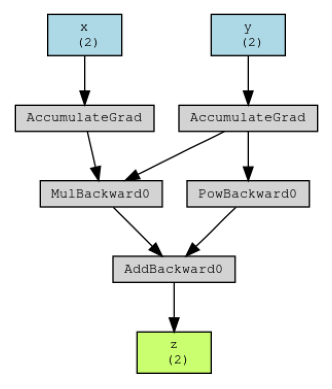

In [10]:
img = plt.imread("grad_computation_graph.png")
plt.imshow(img)
plt.axis('off')
plt.show()

## 1.3. Detaching Tensors from Computation Graph

The `detach()` method is used to create a new tensor that shares storage with the original tensor but without tracking operations. When you call `detach()`, it returns a new tensor that does not require gradients. This is useful when you want to perform operations on a tensor without affecting the computation graph.

In [11]:
# Let's detach z from the computation graph
print("Before detaching z from computation: ", z.requires_grad)
z_det = z.detach()
print("After detaching z from computation: ", z_det.requires_grad)

Before detaching z from computation:  True
After detaching z from computation:  False


##  1.4. Can Backpropagation be performed when `requires_grad=False`?
Now the same tensors $x$ and $y$ are created with `requires_grad=False`.

When attempting to compute the gradients using `z.backward()`, a **RuntimeError** is raised because the tensors do not require gradients, and thus do not have a `grad_fn`.

In this case, since `requires_grad=False` was used, the computation graph is essentially empty, as no gradients will be tracked.

In [12]:
x = torch.tensor(2.0, requires_grad=False)
y = torch.tensor(3.0, requires_grad=False)


# Perform simple operations
z = x * y + y**2


# Compute the gradients
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

# 2. Backpropagation in Neural Networks

<img src=https://learnopencv.com/wp-content/uploads/2017/10/gradient-descent-2d-diagram.png>

We have understood the mathematical intuition behind and how **torch.autograd** takes care of automatic differentiation with an example.

Then,
 * The loss is calculate between prediction and target using `loss(predcition,target`)
 * Then backpropagation is performed using `loss.backward()`
 * We update the new weights using `optimizer.step()`

<img src=https://learnopencv.com/wp-content/uploads/2023/01/keras-linear-regression-weight-update-block-diagram.png>


**The Weight Update Formula is:**


$$ \mathbf{w}_{\text{new}} = \mathbf{w} - \eta \nabla L(\mathbf{w}) $$

The gradient of $ L $ is a vector of partial derivatives:

$$ \nabla L = \left( \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \ldots, \frac{\partial L}{\partial w_n} \right) $$

- **Current Weights $( \mathbf{w} )$**: These are the weights of the model before the update.
- **Learning Rate $( \eta )$**: A hyperparameter that controls the step size of the weight update. A smaller learning rate makes the training process slower but more precise, while a larger learning rate makes the training process faster but it may sometimes overshoot the optimal solution.
- **Gradient of the Loss $( \nabla L(\mathbf{w}) )$**: The partial derivatives of the loss function with respect to each weight. This indicates the direction and magnitude of the steepest ascent in the loss function.
- **Updated Weights $(\mathbf{w}_{\text{new}} )$**: The new weights after applying the gradient descent step.


After applying the updates, it's crucial to zero out the gradients. This is typically done using: `optimizer.zer_grad()`



Interesting, right? This is how the model learns. During training, the model iteratively adjusts its weights and biases to minimize the loss function, which measures the difference between the predicted outputs and the actual targets.

This process of forward pass, gradient computation, backward pass, and parameter update is repeated for many iterations (epochs) over the entire dataset. With each iteration, the model's parameters are refined, gradually reducing the loss and improving the model's performance.

In our upcoming notebooks we will understand all these concepts with hands on training.

In [13]:
import torch
Y = torch.tensor([1.0,], requires_grad=True)
with torch.no_grad():
	new_tensor = Y*2
	print(new_tensor.requires_grad, Y.requires_grad)

False True
